In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [3]:
dataset= pd.read_csv('E:\\Assignment-2_Data.csv')

In [4]:
dataset_original = dataset.copy()

In [5]:
dataset.isna().any()

Id           False
age           True
job          False
marital      False
education    False
default      False
balance       True
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [6]:
#handling null values

In [7]:
dataset['age'].fillna(value= dataset['age'].mean(), inplace=True)

In [8]:
dataset['education'].fillna(value='unknown' ,inplace=True)

In [9]:
dataset['default'].fillna(value= dataset['default'].mode(), inplace=True)

In [10]:
dataset['balance'].fillna(value= dataset['balance'].mean(), inplace=True)

In [11]:
dataset['housing'].fillna(value= dataset['housing'].mode(), inplace=True)

In [12]:
dataset['loan'].fillna(value= dataset['loan'].mode(), inplace=True)

In [13]:
dataset['contact'].fillna(value='contact' ,inplace=True)

In [14]:
dataset.dropna(subset=['day'])

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
#dataset['month'].fillna(value= dataset['month'].mode(), inplace=True)

In [16]:
dataset.dropna(subset=['month'])


,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [17]:
dataset['duration'].fillna(value= dataset['duration'].mean(), inplace=True)

In [18]:
dataset['campaign'].fillna(value=1 ,inplace=True)
dataset['pdays'].fillna(value= -1 ,inplace=True)

In [19]:
dataset['previous'].fillna(value=0 ,inplace=True)

In [20]:
dataset['poutcome'].fillna(value='unknown' ,inplace=True)

In [21]:
dataset.dropna(subset=['y'])

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [22]:
dataset

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [23]:
dataset.isna().any()

Id           False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [24]:
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()

In [25]:
#handle categorical data
 #create Dummy variables
y=pd.get_dummies(dataset['job'] , prefix='job')
y

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
#one_hot_encoding
dataset=pd.concat([dataset,pd.get_dummies(dataset['job'], prefix='job' , drop_first=True )],axis=1 )
dataset.drop(['job'], axis=1, inplace=True)
dataset


,Id,age,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1001,999.0,married,tertiary,no,2143.0,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,1002,44.0,single,secondary,no,29.0,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,1003,33.0,married,secondary,no,2.0,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,1004,47.0,married,unknown,no,1506.0,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,1005,33.0,single,unknown,no,1.0,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,married,tertiary,no,825.0,no,no,cellular,17,...,0,0,0,0,0,0,0,1,0,0
45207,46208,71.0,divorced,primary,no,1729.0,no,no,cellular,17,...,0,0,0,1,0,0,0,0,0,0
45208,46209,72.0,married,secondary,no,5715.0,no,no,cellular,17,...,0,0,0,1,0,0,0,0,0,0
45209,46210,57.0,married,secondary,no,668.0,no,no,telephone,17,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y=pd.get_dummies(dataset['marital'] , prefix='marital')
y

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [28]:
#one_hot_encoding
dataset=pd.concat([dataset,pd.get_dummies(dataset['marital'], prefix='marital' , drop_first=True
)],axis=1 )
dataset.drop(['marital'], axis=1, inplace=True)
dataset

,Id,age,education,default,balance,housing,loan,contact,day,month,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,1001,999.0,tertiary,no,2143.0,yes,no,unknown,5,may,...,1,0,0,0,0,0,0,0,1,0
1,1002,44.0,secondary,no,29.0,yes,no,unknown,5,may,...,0,0,0,0,0,1,0,0,0,1
2,1003,33.0,secondary,no,2.0,yes,yes,unknown,5,may,...,0,0,0,0,0,0,0,0,1,0
3,1004,47.0,unknown,no,1506.0,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,1,0
4,1005,33.0,unknown,no,1.0,no,no,unknown,5,may,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,tertiary,no,825.0,no,no,cellular,17,nov,...,0,0,0,0,0,1,0,0,1,0
45207,46208,71.0,primary,no,1729.0,no,no,cellular,17,nov,...,0,1,0,0,0,0,0,0,0,0
45208,46209,72.0,secondary,no,5715.0,no,no,cellular,17,nov,...,0,1,0,0,0,0,0,0,1,0
45209,46210,57.0,secondary,no,668.0,no,no,telephone,17,nov,...,0,0,0,0,0,0,0,0,1,0


In [29]:
y=pd.get_dummies(dataset['education'] , prefix='education')
y

,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
45206,0,0,1,0
45207,1,0,0,0
45208,0,1,0,0
45209,0,1,0,0


In [30]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['education'], prefix='education' , drop_first=True
)],axis=1 )
dataset.drop(['education'], axis=1, inplace=True)
dataset 

,Id,age,default,balance,housing,loan,contact,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,1001,999.0,no,2143.0,yes,no,unknown,5,may,261,...,0,0,0,0,0,1,0,0,1,0
1,1002,44.0,no,29.0,yes,no,unknown,5,may,151,...,0,0,1,0,0,0,1,1,0,0
2,1003,33.0,no,2.0,yes,yes,unknown,5,may,76,...,0,0,0,0,0,1,0,1,0,0
3,1004,47.0,no,1506.0,yes,no,unknown,5,may,92,...,0,0,0,0,0,1,0,0,0,1
4,1005,33.0,no,1.0,no,no,unknown,5,may,198,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,no,825.0,no,no,cellular,17,nov,977,...,0,0,1,0,0,1,0,0,1,0
45207,46208,71.0,no,1729.0,no,no,cellular,17,nov,456,...,0,0,0,0,0,0,0,0,0,0
45208,46209,72.0,no,5715.0,no,no,cellular,17,nov,1127,...,0,0,0,0,0,1,0,1,0,0
45209,46210,57.0,no,668.0,no,no,telephone,17,nov,508,...,0,0,0,0,0,1,0,1,0,0


In [31]:
y=pd.get_dummies(dataset['default'] , prefix='default')
y

,default_no,default_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,1,0


In [32]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['default'], prefix='default' , drop_first=True
)],axis=1 )

In [33]:
dataset.drop(['default'], axis=1, inplace=True)
dataset

,Id,age,balance,housing,loan,contact,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes
0,1001,999.0,2143.0,yes,no,unknown,5,may,261,1,...,0,0,0,0,1,0,0,1,0,0
1,1002,44.0,29.0,yes,no,unknown,5,may,151,1,...,0,1,0,0,0,1,1,0,0,0
2,1003,33.0,2.0,yes,yes,unknown,5,may,76,1,...,0,0,0,0,1,0,1,0,0,0
3,1004,47.0,1506.0,yes,no,unknown,5,may,92,1,...,0,0,0,0,1,0,0,0,1,0
4,1005,33.0,1.0,no,no,unknown,5,may,198,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,825.0,no,no,cellular,17,nov,977,3,...,0,1,0,0,1,0,0,1,0,0
45207,46208,71.0,1729.0,no,no,cellular,17,nov,456,2,...,0,0,0,0,0,0,0,0,0,0
45208,46209,72.0,5715.0,no,no,cellular,17,nov,1127,5,...,0,0,0,0,1,0,1,0,0,0
45209,46210,57.0,668.0,no,no,telephone,17,nov,508,4,...,0,0,0,0,1,0,1,0,0,0


In [34]:
y=pd.get_dummies(dataset['housing'] , prefix='housing')
y


,housing_no,housing_yes
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,1,0


In [35]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['housing'], prefix='housing' , drop_first=True
)],axis=1 )
dataset.drop(['housing'], axis=1, inplace=True)
dataset 

,Id,age,balance,loan,contact,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes
0,1001,999.0,2143.0,no,unknown,5,may,261,1,-1,...,0,0,0,1,0,0,1,0,0,1
1,1002,44.0,29.0,no,unknown,5,may,151,1,-1,...,1,0,0,0,1,1,0,0,0,1
2,1003,33.0,2.0,yes,unknown,5,may,76,1,-1,...,0,0,0,1,0,1,0,0,0,1
3,1004,47.0,1506.0,no,unknown,5,may,92,1,-1,...,0,0,0,1,0,0,0,1,0,1
4,1005,33.0,1.0,no,unknown,5,may,198,1,-1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,825.0,no,cellular,17,nov,977,3,-1,...,1,0,0,1,0,0,1,0,0,0
45207,46208,71.0,1729.0,no,cellular,17,nov,456,2,-1,...,0,0,0,0,0,0,0,0,0,0
45208,46209,72.0,5715.0,no,cellular,17,nov,1127,5,184,...,0,0,0,1,0,1,0,0,0,0
45209,46210,57.0,668.0,no,telephone,17,nov,508,4,-1,...,0,0,0,1,0,1,0,0,0,0


In [36]:
y=pd.get_dummies(dataset['loan'] , prefix='loan')
y

,loan_no,loan_yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,1,0


In [37]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['loan'], prefix='loan' , drop_first=True )],axis=1 )
dataset.drop(['loan'], axis=1, inplace=True)
dataset


,Id,age,balance,contact,day,month,duration,campaign,pdays,previous,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,1001,999.0,2143.0,unknown,5,may,261,1,-1,0,...,0,0,1,0,0,1,0,0,1,0
1,1002,44.0,29.0,unknown,5,may,151,1,-1,0,...,0,0,0,1,1,0,0,0,1,0
2,1003,33.0,2.0,unknown,5,may,76,1,-1,0,...,0,0,1,0,1,0,0,0,1,1
3,1004,47.0,1506.0,unknown,5,may,92,1,-1,0,...,0,0,1,0,0,0,1,0,1,0
4,1005,33.0,1.0,unknown,5,may,198,1,-1,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,825.0,cellular,17,nov,977,3,-1,0,...,0,0,1,0,0,1,0,0,0,0
45207,46208,71.0,1729.0,cellular,17,nov,456,2,-1,0,...,0,0,0,0,0,0,0,0,0,0
45208,46209,72.0,5715.0,cellular,17,nov,1127,5,184,3,...,0,0,1,0,1,0,0,0,0,0
45209,46210,57.0,668.0,telephone,17,nov,508,4,-1,0,...,0,0,1,0,1,0,0,0,0,0


In [38]:
y=pd.get_dummies(dataset['contact'] , prefix='contact')
y


,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
45206,1,0,0
45207,1,0,0
45208,1,0,0
45209,0,1,0


In [39]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['contact'], prefix='contact' , drop_first=True
)],axis=1 )
dataset.drop(['contact'], axis=1, inplace=True)
dataset

,Id,age,balance,day,month,duration,campaign,pdays,previous,poutcome,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,1001,999.0,2143.0,5,may,261,1,-1,0,unknown,...,1,0,0,1,0,0,1,0,0,1
1,1002,44.0,29.0,5,may,151,1,-1,0,unknown,...,0,1,1,0,0,0,1,0,0,1
2,1003,33.0,2.0,5,may,76,1,-1,0,unknown,...,1,0,1,0,0,0,1,1,0,1
3,1004,47.0,1506.0,5,may,92,1,-1,0,unknown,...,1,0,0,0,1,0,1,0,0,1
4,1005,33.0,1.0,5,may,198,1,-1,0,unknown,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,825.0,17,nov,977,3,-1,0,unknown,...,1,0,0,1,0,0,0,0,0,0
45207,46208,71.0,1729.0,17,nov,456,2,-1,0,unknown,...,0,0,0,0,0,0,0,0,0,0
45208,46209,72.0,5715.0,17,nov,1127,5,184,3,success,...,1,0,1,0,0,0,0,0,0,0
45209,46210,57.0,668.0,17,nov,508,4,-1,0,unknown,...,1,0,1,0,0,0,0,0,1,0


In [40]:
y=pd.get_dummies(dataset['month'] , prefix='month')
y

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,0,0,0,0,1,0,0
45208,0,0,0,0,0,0,0,0,0,1,0,0
45209,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['month'], prefix='month' , drop_first=True
)],axis=1 )
dataset.drop(['month'], axis=1, inplace=True)
dataset

,Id,age,balance,day,duration,campaign,pdays,previous,poutcome,y,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1001,999.0,2143.0,5,261,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
1,1002,44.0,29.0,5,151,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
2,1003,33.0,2.0,5,76,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
3,1004,47.0,1506.0,5,92,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
4,1005,33.0,1.0,5,198,1,-1,0,unknown,no,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,825.0,17,977,3,-1,0,unknown,yes,...,0,0,0,0,0,0,0,1,0,0
45207,46208,71.0,1729.0,17,456,2,-1,0,unknown,yes,...,0,0,0,0,0,0,0,1,0,0
45208,46209,72.0,5715.0,17,1127,5,184,3,success,yes,...,0,0,0,0,0,0,0,1,0,0
45209,46210,57.0,668.0,17,508,4,-1,0,unknown,no,...,0,0,0,0,0,0,0,1,0,0


In [42]:
y=pd.get_dummies(dataset['poutcome'] , prefix='poutcome')
y

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,1,0
45209,0,0,0,1


In [43]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['poutcome'], prefix='poutcome' , drop_first=True
)],axis=1 )
dataset.drop(['poutcome'], axis=1, inplace=True)
dataset

,Id,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1001,999.0,2143.0,5,261,1,-1,0,no,0,...,0,0,0,1,0,0,0,0,0,1
1,1002,44.0,29.0,5,151,1,-1,0,no,0,...,0,0,0,1,0,0,0,0,0,1
2,1003,33.0,2.0,5,76,1,-1,0,no,0,...,0,0,0,1,0,0,0,0,0,1
3,1004,47.0,1506.0,5,92,1,-1,0,no,1,...,0,0,0,1,0,0,0,0,0,1
4,1005,33.0,1.0,5,198,1,-1,0,no,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,825.0,17,977,3,-1,0,yes,0,...,0,0,0,0,1,0,0,0,0,1
45207,46208,71.0,1729.0,17,456,2,-1,0,yes,0,...,0,0,0,0,1,0,0,0,0,1
45208,46209,72.0,5715.0,17,1127,5,184,3,yes,0,...,0,0,0,0,1,0,0,0,1,0
45209,46210,57.0,668.0,17,508,4,-1,0,no,1,...,0,0,0,0,1,0,0,0,0,1


In [44]:
y=pd.get_dummies(dataset['y'] , prefix='y')
y

,y_no,y_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45206,0,1
45207,0,1
45208,0,1
45209,1,0


In [45]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['y'], prefix='y' , drop_first=True )],axis=1 )
dataset.drop(['y'], axis=1, inplace=True)
dataset

,Id,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,1001,999.0,2143.0,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1002,44.0,29.0,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1003,33.0,2.0,5,76,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1004,47.0,1506.0,5,92,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,1005,33.0,1.0,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,825.0,17,977,3,-1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,46208,71.0,1729.0,17,456,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,46209,72.0,5715.0,17,1127,5,184,3,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,46210,57.0,668.0,17,508,4,-1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
print(dataset['Id'].skew())
print(dataset['age'].skew())
print(dataset['balance'].skew())
print(dataset['day'].skew())
print(dataset['duration'].skew())
print(dataset['campaign'].skew())
print(dataset['pdays'].skew())
print(dataset['previous'].skew())

0.0
13.18968218176451
8.360357863636318
0.09307901402122411
3.144318099423456
4.898650166179674
2.6157154736563477
41.84645447266292


In [47]:
print(dataset['age'].skew())
dataset["age"]=dataset["age"].map(lambda i: np.log(i) if i >0 else 0)
print(dataset['age'].skew())

13.18968218176451
-0.05299727514398358


In [48]:
print(dataset['balance'].skew())
dataset["balance"]=dataset["balance"].map(lambda i: np.log(i) if i >0 else 0)
print(dataset['balance'].skew())

8.360357863636318
-0.8615948377590659


In [49]:
print(dataset['duration'].skew())
dataset["duration"]=dataset["duration"].map(lambda i: np.log(i) if i >0 else 0)
print(dataset['duration'].skew())

3.144318099423456
-0.5066496877758495


In [50]:
print(dataset['campaign'].skew())
dataset["campaign"]=dataset["campaign"].map(lambda i: np.log(i) if i >0 else 0)
print(dataset['campaign'].skew())


4.898650166179674
0.8802108957712975


In [51]:
print(dataset['pdays'].quantile(0.10))
print(dataset['pdays'].quantile(0.90))

-1.0
185.0


In [52]:
print(dataset['pdays'].skew())
q1=dataset['pdays'].quantile(0.25)
q2=dataset['pdays'].quantile(0.75)
iqr=q2-q1
Min=q1 - 1.5 * iqr
Max=q2 + 1.5 * iqr
dataset['pdays'] = np.where(dataset['pdays'] < Min ,-1 , dataset['pdays'])
dataset['pdays'] = np.where(dataset['pdays'] > Max ,185 , dataset['pdays'])
print(dataset['pdays'].skew())

2.6157154736563477
1.6428920856664095


In [53]:
print(dataset['previous'].quantile(0.10))
print(dataset['previous'].quantile(0.90))


0.0
2.0


In [54]:
print(dataset['previous'].skew())
q1=dataset['previous'].quantile(0.25)
q2=dataset['previous'].quantile(0.75)
iqr=q2-q1
Min=q1 - 1.5 * iqr
Max=q2 + 1.5 * iqr
dataset['previous'] = np.where(dataset['previous'] < Min ,0 , dataset['previous'])
dataset['previous'] = np.where(dataset['previous'] > Max , 2, dataset['previous'])
print(dataset['previous'].skew())

41.84645447266292
1.6428920856664087


In [55]:
from sklearn import preprocessing
#normalization
col_names=list(dataset.columns)
mm_Scaler=preprocessing.MinMaxScaler()
dataset=mm_Scaler.fit_transform(dataset)
dataset=pd.DataFrame(dataset , columns=col_names)

In [56]:
dataset

,Id,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0.000000,1.000000,0.664989,0.133333,0.654599,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000022,0.547897,0.291946,0.133333,0.590223,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000044,0.506245,0.060096,0.133333,0.509459,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000066,0.557447,0.634405,0.133333,0.531934,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000088,0.506245,0.000000,0.133333,0.622101,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.999912,0.569273,0.582226,0.533333,0.809877,0.265165,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
45207,0.999934,0.617176,0.646377,0.533333,0.720238,0.167300,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
45208,0.999956,0.619201,0.750032,0.533333,0.826679,0.388459,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
45209,0.999978,0.585376,0.563924,0.533333,0.732941,0.334600,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
dataset.keys()

Index(['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [58]:
x = dataset.drop('y_yes', axis=1)
y = dataset['y_yes']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)



In [60]:
classifier=SVC(kernel='rbf',gamma=0.1,C=10)
classifier.fit(x_train,y_train)

Y_predict=classifier.predict(x_test)



In [61]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      9950
         1.0       0.68      0.41      0.51      1353

    accuracy                           0.91     11303
   macro avg       0.80      0.69      0.73     11303
weighted avg       0.89      0.91      0.90     11303



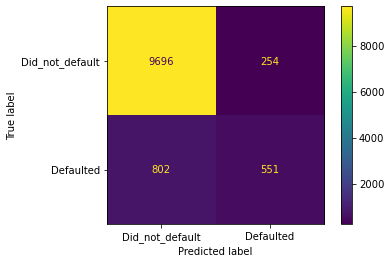

In [62]:
plot_confusion_matrix(classifier,x_test,
                      y_test,
                      values_format='d',
                      display_labels=["Did_not_default","Defaulted"])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.927


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


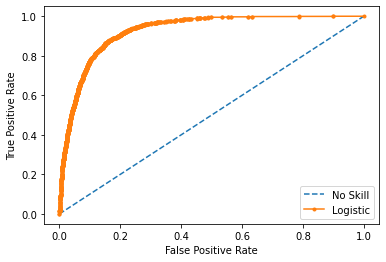

In [63]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]

lr_probs = model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [66]:
print("Accuracy : ", classifier.score(x_test, y_test)*100,'%')

Accuracy :  90.65734760683004 %


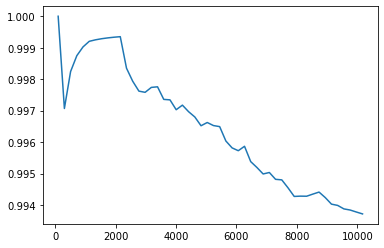

In [71]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(classifier,
                                                         X_test, y_test, cv=10, scoring='accuracy',
                                                         train_sizes=np.linspace(0.01, 1.0, 50))
import matplotlib.pyplot as plt
plt.plot(train_sizes,np.mean(train_scores,axis=1))